# Implementación del algoritmo KNN 

In [1]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import validation_curve
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn.decomposition import PCA
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV


import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

In [54]:
df = pd.read_csv('data_final.txt', sep='\t')
df.head()

,name,spect_b,0.45,0.452002002002002,0.45400400400400404,0.456006006006006,0.458008008008008,0.46001001001001,0.46201201201201203,0.46401401401401404,...,2.431981981981982,2.433983983983984,2.4359859859859863,2.437987987987988,2.43998998998999,2.441991991991992,2.443993993993994,2.4459959959959963,2.447997997997998,2.45
0,Abehiroshi,V,0.9765,0.873727,0.802019,0.908693,0.992507,0.892887,0.806158,0.822114,...,1.453882,1.428696,1.286868,1.095002,0.999979,1.100082,1.281601,1.382604,1.370983,1.3453
1,Senrikyu,B,1.1423,1.104633,1.062175,0.996224,0.949799,1.010879,1.060699,1.024171,...,0.991043,0.997508,1.001280,1.001278,1.000005,0.999570,0.999831,1.000092,1.000091,1.0000
2,Robinson,Sr,0.8445,0.770504,0.786651,0.801385,0.780085,0.812111,0.815159,0.828218,...,1.696828,1.687543,1.699685,1.727674,1.741618,1.724284,1.714307,1.760465,1.817740,1.7467
3,Paris,T,0.9238,0.935045,0.928104,0.933731,0.943692,0.937315,0.953128,0.967190,...,2.056997,1.990262,1.979909,2.040457,1.958246,1.594457,1.155880,0.926450,0.944271,1.0000
4,Farinella,D,0.8795,0.953828,0.956625,0.849646,0.784283,0.867913,0.938608,0.909334,...,1.482280,1.065135,1.077220,1.503595,1.945946,2.089067,2.025298,1.945494,1.926199,1.9289


In [55]:
# Mezclar el dtaset de forma aleatoria
df = df.sample(frac=1).reset_index(drop=True)
df.head()

,name,spect_b,0.45,0.452002002002002,0.45400400400400404,0.456006006006006,0.458008008008008,0.46001001001001,0.46201201201201203,0.46401401401401404,...,2.431981981981982,2.433983983983984,2.4359859859859863,2.437987987987988,2.43998998998999,2.441991991991992,2.443993993993994,2.4459959959959963,2.447997997997998,2.45
0,Herculina,S,0.8914,0.875610,0.881279,0.885462,0.881329,0.888441,0.892893,0.886009,...,1.352781,1.349533,1.351634,1.357668,1.359615,1.353470,1.352754,1.373783,1.394556,1.3545
1,Viola,C,0.9520,0.960647,0.969090,0.957766,0.946112,0.942624,0.926850,0.968657,...,0.999669,0.999658,1.000605,1.001571,1.000018,0.995364,0.995263,1.008854,1.031162,1.0430
2,Amalthea,S,0.7693,0.784984,0.802112,0.804150,0.807045,0.820651,0.822532,0.812712,...,1.500942,1.510873,1.518674,1.520577,1.514157,1.501261,1.500853,1.533893,1.566823,1.5112
3,Semiramis,Sl,0.7910,0.793745,0.816134,0.825555,0.816482,0.812446,0.831987,0.842509,...,1.301540,1.028991,1.079290,1.404117,1.599850,1.388267,1.065285,1.054813,1.368533,1.6032
4,Aegle,T,0.9162,0.922643,0.931914,0.936995,0.936008,0.931473,0.926989,0.929411,...,1.529221,1.533462,1.525479,1.515164,1.534771,1.592302,1.593200,1.424388,1.147495,1.0000


Se observa que el dataset está muy desbalanceado:

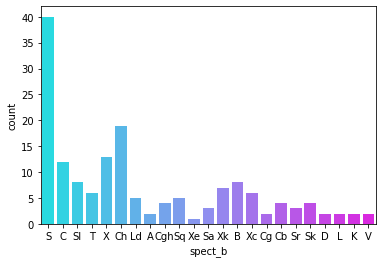

In [56]:
sns.countplot(x='spect_b', data=df, palette='cool')

Se eligen las 4 clases principales: **S,  h,  X,  C**  y quedan 100 asteroides:

In [57]:
df = df[(df.spect_b == 'S') | (df.spect_b == 'Ch') | (df.spect_b == 'X') | (df.spect_b == 'C') | (df.spect_b == 'Sl') | (df.spect_b == 'B') ]
df.shape

(100, 1002)

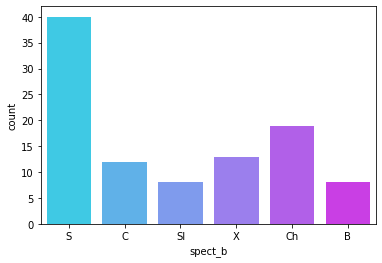

In [58]:
sns.countplot(x='spect_b', data=df, palette='cool')

Se divide en características (intensidad en cada longitud de onda) y labels (tipo espectral): 

In [59]:
X_data = df[df.columns[2:]]
y_data = df.spect_b # label
y_data_code = y_data.astype("category").cat.codes # label numérica

X_data.head()

,0.45,0.452002002002002,0.45400400400400404,0.456006006006006,0.458008008008008,0.46001001001001,0.46201201201201203,0.46401401401401404,0.46601601601601605,0.468018018018018,...,2.431981981981982,2.433983983983984,2.4359859859859863,2.437987987987988,2.43998998998999,2.441991991991992,2.443993993993994,2.4459959959959963,2.447997997997998,2.45
0,0.8914,0.875610,0.881279,0.885462,0.881329,0.888441,0.892893,0.886009,0.884592,0.896773,...,1.352781,1.349533,1.351634,1.357668,1.359615,1.353470,1.352754,1.373783,1.394556,1.3545
1,0.9520,0.960647,0.969090,0.957766,0.946112,0.942624,0.926850,0.968657,0.982194,0.951616,...,0.999669,0.999658,1.000605,1.001571,1.000018,0.995364,0.995263,1.008854,1.031162,1.0430
2,0.7693,0.784984,0.802112,0.804150,0.807045,0.820651,0.822532,0.812712,0.824150,0.847672,...,1.500942,1.510873,1.518674,1.520577,1.514157,1.501261,1.500853,1.533893,1.566823,1.5112
3,0.7910,0.793745,0.816134,0.825555,0.816482,0.812446,0.831987,0.842509,0.840046,0.844609,...,1.301540,1.028991,1.079290,1.404117,1.599850,1.388267,1.065285,1.054813,1.368533,1.6032
5,0.8674,0.864887,0.847679,0.852389,0.877586,0.876000,0.852566,0.872618,0.886052,0.872929,...,1.285539,1.287056,1.290116,1.293470,1.293911,1.290567,1.292408,1.309674,1.324134,1.2889


La longitud de onda máxima a la cual se considera rango visible es a los $0.730 \mu m$.

In [60]:
print(X_data.columns[142])
X_visible = X_data[X_data.columns[:142]]
print('Shape dataframe espectro visible',X_visible.shape)

0.7342842842842843
Shape dataframe espectro visible (100, 142)


In [61]:
X_nir = X_data[X_data.columns[142:]]
print('Shape dataframe espectro infrarrojo cercano',X_nir.shape)

Shape dataframe espectro infrarrojo cercano (100, 858)


## Resultados con el dataframe del espectro **Visible**

In [62]:
X_train_vis, X_test_vis, y_train_vis, y_test_vis = train_test_split(X_visible, y_data_code, test_size=0.3, random_state=1)
X_train_vis.shape, X_test_vis.shape, y_train_vis.shape, y_test_vis.shape

((70, 142), (30, 142), (70,), (30,))

#### Entrenamiento y GridSearch: Búsqueda de mejores hiperparámetros

In [63]:
def graph_neighbors(X_train, y_train, X_test, y_test):
    
    training_accuracy = []
    test_accuracy = []

    # try n_neighbors from 1 to 10
    neighbors_settings = range(1, 20)

    for n_neighbors in neighbors_settings:
        clf = KNeighborsClassifier(n_neighbors=n_neighbors)
        clf.fit(X_train, y_train)
        # record training set accuracy
        training_accuracy.append(clf.score(X_train, y_train))
        # record generalization accuracy
        test_accuracy.append(clf.score(X_test, y_test))


    plt.plot(neighbors_settings, training_accuracy, label="training accuracy")
    plt.plot(neighbors_settings, test_accuracy, label="test accuracy")
    plt.ylabel("Accuracy")
    plt.xlabel("n_neighbors")
    plt.legend()

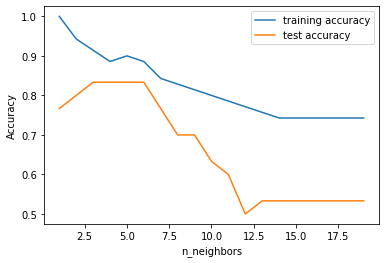

In [64]:
graph_neighbors(X_train_vis, y_train_vis, X_test_vis, y_test_vis)

In [65]:
def model(X_train, y_train):
    
    knn = KNeighborsClassifier()  
    
    param_grid = dict(n_neighbors=list(range(1, 20)), 
                      weights=['uniform', 'distance'],
                      algorithm=['auto', 'ball_tree', 'kd_tree', 'brute'])

    grid = GridSearchCV(knn, param_grid, cv=5)
    grid.fit(X_train, y_train)
    
    best_param = grid.best_params_
    
    print('Mejores hiperparámetros',grid.best_params_)
    print('Mejor score',grid.best_score_)
    
    return best_param

In [66]:
best_param_vis = model(X_train_vis, y_train_vis)

/Users/daniandreacosmo/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:667: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  % (min_groups, self.n_splits)), UserWarning)


Mejores hiperparámetros {'algorithm': 'auto', 'n_neighbors': 1, 'weights': 'uniform'}
Mejor score 0.9


### Modelo final con espectro visible

In [79]:
def train_test_model(X_train, y_train, X_test, y_test, y_data, best_param):
    
    clf = KNeighborsClassifier(**best_param)
    clf.fit(X_train, y_train)

    p = clf.predict(X_test)
    
    #Importe el módulo de métricas de sklearn para medir el desempeño (accuracy_score) de su modelo.
    print("Train set Accuracy: ", metrics.accuracy_score(y_train, clf.predict(X_train)))
    print("Test set Accuracy: ", metrics.accuracy_score(y_test, p))
    
    # Matrix de confusión
    mat = confusion_matrix(y_test, p)
    sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False, cmap="Blues")
    plt.title('Matriz de confusión')
    plt.xlabel('true label')
    plt.ylabel('predicted label')
    print(classification_report(y_test, p))
    
    
    #train model with cv of 5 
    cv_scores = cross_val_score(clf, X_test , y_test, cv=5)
    #print each cv score (accuracy) and average them
    print(cv_scores)
    print('cv_scores mean:{}'.format(np.mean(cv_scores)))
    
    # Show first two principal components without scaler
    pca = PCA()
    plt.figure(figsize=(8,6))
    Xt = pca.fit_transform(X_test)
    plot = plt.scatter(Xt[:,0], Xt[:,1], c=y_test)
    plt.legend(handles=plot.legend_elements()[0], labels=list(y_data))
    plt.xlabel("PC1")
    plt.ylabel("PC2")
    plt.title("First two principal components")
    plt.show()
    
    return p

Train set Accuracy:  1.0
Test set Accuracy:  0.7666666666666667
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         3
           1       0.40      1.00      0.57         2
           2       1.00      0.80      0.89         5
           3       0.88      0.70      0.78        10
           4       0.50      0.75      0.60         4
           5       1.00      0.67      0.80         6

    accuracy                           0.77        30
   macro avg       0.80      0.82      0.77        30
weighted avg       0.85      0.77      0.79        30

[0.83333333 0.66666667 0.83333333 0.83333333 0.83333333]
cv_scores mean:0.8


/Users/daniandreacosmo/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:667: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=5.
  % (min_groups, self.n_splits)), UserWarning)


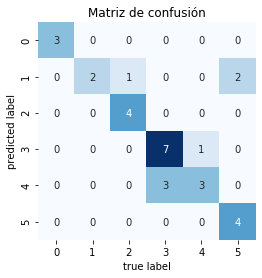

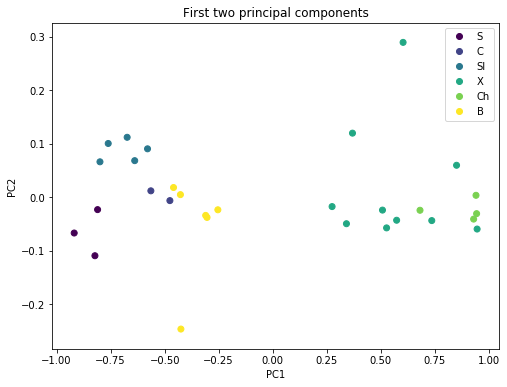

In [81]:
pred_vis = train_test_model(X_train_vis, 
                            y_train_vis, 
                            X_test_vis, 
                            y_test_vis, 
                            y_data, 
                            best_param_vis)

In [69]:
compa = pd.DataFrame({'y_test': y_test_vis.values, 'p': pred_vis})
compa

,y_test,p
0,3,3
1,5,5
2,3,3
3,4,3
4,1,1
5,3,3
6,5,1
7,3,3
8,0,0
9,3,4


## Resultados con el dataframe del espectro **Infrarrojo Cercano**

In [70]:
X_train_nir, X_test_nir, y_train_nir, y_test_nir = train_test_split(X_nir, y_data_code, test_size=0.3, random_state=1)
X_train_nir.shape, X_test_nir.shape, y_train_nir.shape, y_test_nir.shape

((70, 858), (30, 858), (70,), (30,))

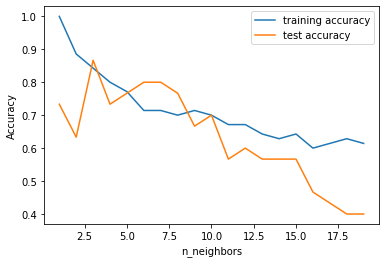

In [71]:
graph_neighbors(X_train_nir, y_train_nir, X_test_nir, y_test_nir)

In [72]:
best_param_nir = model(X_train_nir, y_train_nir)

/Users/daniandreacosmo/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:667: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  % (min_groups, self.n_splits)), UserWarning)


Mejores hiperparámetros {'algorithm': 'auto', 'n_neighbors': 3, 'weights': 'distance'}
Mejor score 0.7


Train set Accuracy:  1.0
Test set Accuracy:  0.8333333333333334
              precision    recall  f1-score   support

           0       1.00      0.67      0.80         3
           1       1.00      0.50      0.67         2
           2       0.62      1.00      0.77         5
           3       1.00      0.90      0.95        10
           4       0.67      1.00      0.80         4
           5       1.00      0.67      0.80         6

    accuracy                           0.83        30
   macro avg       0.88      0.79      0.80        30
weighted avg       0.89      0.83      0.84        30

[0.5        0.5        0.83333333 0.66666667 1.        ]
cv_scores mean:0.7


/Users/daniandreacosmo/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:667: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=5.
  % (min_groups, self.n_splits)), UserWarning)


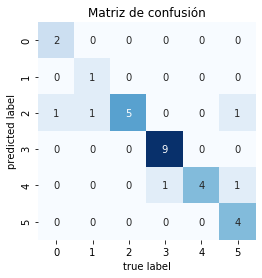

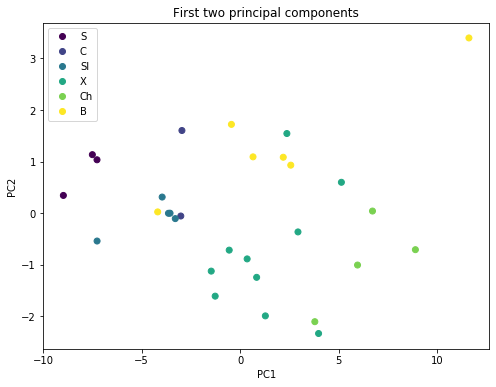

In [82]:
pred_nir = train_test_model(X_train_nir, 
                            y_train_nir, 
                            X_test_nir, 
                            y_test_nir, 
                            y_data, 
                            best_param_nir)